Cortesia de Nicolas Bodnariuk

 **Los oceanógrados trabajamos con grandes volúmenes de datos**
 Necesitamos contar con herramientas para la programación y para el análisis de los datos


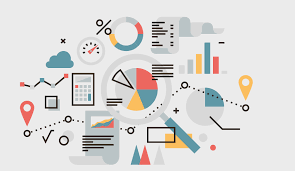

**Instalación de Librería para el procesamiento de datos netCDF**

Un tipo de archivo típico que usamos los oceanógrafos es el **netCDF**

Este tipo de archivos presenta una organización interna útil para el análisis de datos. Por ejemplo: si queremos cargar datos que pesan Gigas, podemos sólo cargar una porción pequeña de ellos sin necesidad de leer el archivo completo.

Esto es muy útil, especialmente al trabajar con grandes volúmenes de datos!

---



Los siguientes comandos permiten instalar una librería en Google Colabs para poder trabajar con netCDFs

In [1]:
!pip install netCDF4 # para cargar este tipo de archivos netcdf
import netCDF4 as nc # para cargar este tipo de archivos netcdf
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Levanto los datos de la compu para cargarlos en Google Colabs (Puede llevar tiempo, ver el % de carga)**

Para empezar a trabajar es necesario cargar los datos, subirlos a nuestro escritorio en Google Colabs para poder operar.

Cargar: datos de altimetría y datos de la boya

In [3]:
from google.colab import files # para importar datos de la PC
uploaded = files.upload()

Saving boya.nc to boya.nc


**¿Pero qué es la altimetría satelital y qué es una boya?**

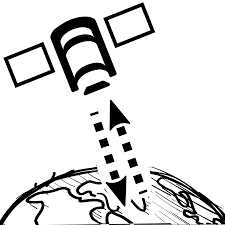

La altimetría satelital nos permite medir la altura de la superficie del mar a través de satélites.

**¿Pero para qué queremos conocer la altura del mar o su relieve?**

Si conocemos la altura del mar podemos inferir información respecto de las corrientes, es decir, de cómo es la circulación del océano


**¿Qué es una boya?¿Para qué la usan los oceanógrafos?**

Una boya oceanográfica es un objeto flotante que es transportado por las corrientes oceánicas. Los oceanógrafos las empleamos para comprender las características de la circulación del océano.

Debemos recordar dos aspectos fundamentales:

- Las boyas las seguimos con GPS para poder conocer la posición en distintos momentos del tiempo.

- Las boyas tienen un "ancla de capa", es decir, como un "paracaídas" ubicado a metros debajo de la superficie del mar para garantizar que la boya siga a las corrientes y no a los vientos

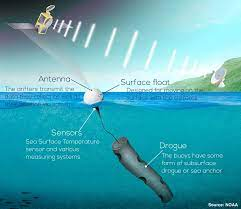

**Ahora que ya cargamos los datos vamos a leerlos empezando por los datos de las boyas**

**Cargamos los datos de la boya**

In [5]:
file = 'boya.nc'
ds4 = nc.Dataset(file)
#print(ds4)
for var in ds4.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int32 WMO(row)
    _FillValue: -999999
    actual_range: [3301654 3301654]
    colorBarMaximum: 100.0
    colorBarMinimum: 0.0
    history: From dirall.dat
    long_name: World Meteorological Organization buoy identification number
    missing_value: -999999
unlimited dimensions: 
current shape = (1688,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 longitude(row)
    _CoordinateAxisType: Lon
    _FillValue: -999999.0
    actual_range: [-60.607 -34.163]
    axis: X
    colorBarMaximum: 180.0
    colorBarMinimum: -180.0
    history: From buoydata_10001_15000.dat
    ioos_category: Location
    long_name: Longitude
    missing_value: -999999.0
    standard_name: longitude
    units: degrees_east
    valid_max: 180.0
    valid_min: -180.0
unlimited dimensions: 
current shape = (1688,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 latitude(row)
    _CoordinateAxisType: Lat
    _FillValue: -999999.0
    actual_range: [-48.991 -40.711]
  

Cargamos la trayectoria de la boya: las posiciones de latitud y longitud en distintos momento de tiempo.

In [6]:
# declaro las variables (campo de velocidad, retícula lon-lat y tiempo)
tb=ds4['time'][:]
latb=ds4['latitude'][:]
lonb=ds4['longitude'][:]

Vamos a mirar la trayectoria en una figura

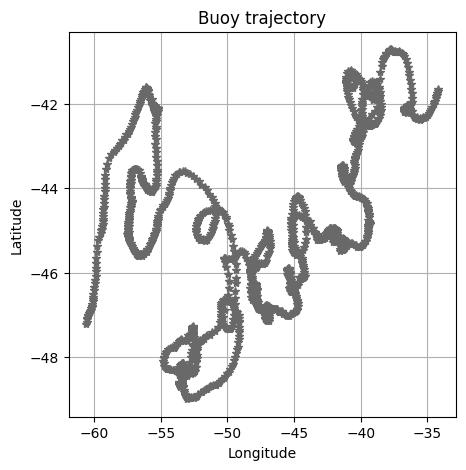

Figure 1: The trajectory of the buoy lauched the 9 of September 2021


In [8]:
plt.figure(figsize=(5, 5))
plt.title("Buoy trajectory")
plt.plot(lonb, latb, "*", color="dimgrey")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()
print("Figure 1: The trajectory of the buoy lauched the 9 of September 2021")

**Ahora cargamos los datos de altura del nivel del mar y de corrientes**

In [10]:
file = 'dataset-duacs-nrt-global-merged-allsat-phy-l4_1656456200710.nc'
ds2 = nc.Dataset(file)
print(ds2)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions: Unidata Dataset Discovery v1.0
    cdm_data_type: Grid
    comment: Sea Surface Height measured by Altimetry and derived variables
    contact: servicedesk.cmems@mercator-ocean.eu
    creator_email: servicedesk.cmems@mercator-ocean.eu
    creator_name: CMEMS - Sea Level Thematic Assembly Center
    creator_url: http://marine.copernicus.eu
    date_created: 2022-06-28T01:01:10Z
    date_issued: 2022-06-28T01:01:10Z
    date_modified: 2022-06-28T01:01:10Z
    FROM_ORIGINAL_FILE__geospatial_lat_max: 89.875
    FROM_ORIGINAL_FILE__geospatial_lat_min: -89.875
    FROM_ORIGINAL_FILE__geospatial_lat_resolution: 0.25
    FROM_ORIGINAL_FILE__geospatial_lat_units: degrees_north
    FROM_ORIGINAL_FILE__geospatial_lon_max: 179.875
    FROM_ORIGINAL_FILE__geospatial_lon_min: -179.875
    FROM_ORIGINAL_FILE__geospatial_lon_resolution: 

Justo en el renglón anterior pudimos ver las variables que están dentro del archivo y sus nombres. Usamos esos nombres para leer los datos de:

- ADT (Absolute dynamic topography): altura del nivel del mar
- ugos : velocidad oeste-este
- vgos: velocidad sur-norte

**Estas tres variables están definidas en el mapa (latitud, longitud) y también en el tiempo (tenemos un mapa para cada día del estado de circulación del océano)**

In [11]:
# declaro las variables (ADT, retícula lon-lat y tiempo)
ADT=ds2['adt'][:]
ugos=ds2['ugos'][:]
vgos=ds2['vgos'][:]
th=ds2['time'][:]
lath=ds2['latitude'][:]
lonh=ds2['longitude'][:]

**¿Cómo trabajamos con la variable "tiempo"?**

Los oceanógrafos utilizamos **fechas julianas** para el procesamiento de los datos.

Todos estamos acostumbrados en el día a día a usar la **fecha en su formato gregoriano**, por ejemplo el 15/05/2023 sabemos que es el día 15 de mayo del 2023. Pero si quisiéramos saber cuántos días pasaron entre el 15/05/2023 y el 04/08/2023, no sería conveniente usar este formato de fecha, ya que tendríamos que hacer varias cuentas.

Para eso los oceanógrafos definen un día como el día 0 y comienzan a contar el paso del tiempo desde esta fecha. Por ej. el día 0 podría ser el 15/05/2023  a las 0 hotas, el 16/05/2023 a las 0 horas sería el día 1 y el 16/05/2023 a las 12 horas sería el día 1.5 (pasó un día y medio).


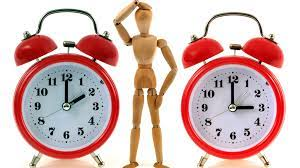

**Boyas y altimetría: cada base de datos con su formato**

Los siguientes comandos usan una función de Google Colabs para pasar la fecha de su forma gregoriana a su forma juliana. Usamos la información de los netCDFs para **definir el día 0 de forma correcta** según las indicaciones de quien creó la base de datos. Cada base de datos tiene su propio 0.

In [12]:
!pip install juliandate
import juliandate as jd
t0=jd.from_gregorian(1950,1,1,0,0,0) # es el offset
tf=th+t0 # le resto el offset para ir al año 0000
tprueba=jd.to_gregorian(tf[0])
print(tprueba)

t0b=jd.from_gregorian(1970,1,1,0,0,0) # es el offset
tfb=tb/(24*3600)+t0b
tprueba=jd.to_gregorian(tfb[0])
print(tprueba)

(2021, 8, 1, 0, 0, 0, 0)
(2021, 9, 9, 0, 0, 0, 0)


In [13]:
#np

NameError: name 'np' is not defined

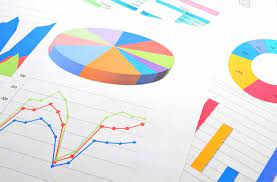

**Ahora sí, tiempo de graficar para ver los datos !**

Ahora que tenemos todos los datos cargados y todos los tiempos en el formato que necesitamos podemos armar un video que muestre cómo cambia la altura del mar en el tiempo, las corrientes y la posición de la boya.

El siguiente comando genera cada imagen instantánea para crear el video deseado de la evolución temporal de las distintas variables

In [17]:
import numpy as np
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage


duration=30

def make_frame(i):
  #fig, ax = plt.subplots(1,1)

  ax.clear()
  tiempo=jd.from_gregorian(2021,9,8+(i/duration)*60,0,0,0) # cambiar fecha en función de los datos
  idx = (np.abs(tf - tiempo)).argmin()
  #print(idx)
  #print(jd.to_gregorian(tf[idx]))
  plt.set_cmap('seismic')
  im=ax.contourf(lonh,lath,ADT[idx,:,:],np.linspace(-1.5,1.5,50))
  ax.quiver(lonh,lath,ugos[idx,:,:],vgos[idx,:,:],color='black')
  ax.plot(lonb[:],latb[:],'k')

  idxb = (np.abs(tfb - tiempo)).argmin()
  #print(idxb)
  ax.plot(lonb[idxb],latb[idxb],'o',color=[.5, 0, 0])

  lista=jd.to_gregorian(tf[idx])
  ax.set_title(str(lista[2])+" / "+str(lista[1])+" / "+str(lista[0]))
  # cambiar los limites geograficos en función de los datos
  xmin=-61
  xmax= -45
  ymin= -50
  ymax= -40
  ax.axis('equal')
  ax.axis([xmin,xmax,ymin,ymax])
  vecx=np.linspace(xmin,xmax,5)
  vecy=np.linspace(ymin,ymax,3)
  ax.set_xticks(vecx)
  ax.set_yticks(vecy)

  vecxla=[]
  for i in range(len(vecx)):
    vecxla.append(str(abs(vecx[i]))+"°O")

  vecyla=[]
  for i in range(len(vecy)):
    vecyla.append(str(abs(vecy[i]))+"°S")

  #print(vecxla)

  ax.set_xticklabels(vecxla)
  ax.set_yticklabels(vecyla)

  ax.set_aspect('equal','box')

  from mpl_toolkits.axes_grid1 import make_axes_locatable
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)

  plt.colorbar(im, cax=cax,ticks=np.linspace(-1,1,5),label='m')

  plt.rcParams['figure.figsize'] = (8,8)
  return mplfig_to_npimage(fig)


**Animación**

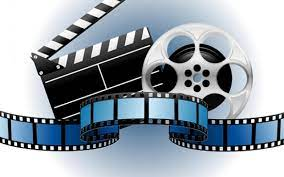

El video se armará al poner "play" al siguiente comando

In [18]:
fig, ax = plt.subplots()

animation = VideoClip(make_frame, duration = duration)

# displaying animation with auto play and looping
animation.ipython_display(fps = 5, loop = False, autoplay = True)

Output hidden; open in https://colab.research.google.com to view.